Old script from comet to reference when building animations, downloading libraries - some things here are inefficient

In [22]:
#Import the acrtuals to compare to model guesses
#nc file
import math
import netCDF4
import numpy as np
import time
import matplotlib.pyplot as plt
print('begin')

#Path for Aqua_Planet, 2 months
#dataset = netCDF4.Dataset("/Users/griffinmooers/Desktop/UCI_Coding/preprocessed_data/full_physics_essentials_valid_month02_targets.nc")

#Path for Aqua_Planet, 2 months, No VPB
dataset = netCDF4.Dataset("/oasis/scratch/comet/gmooers/temp_project/SCRIPTS/preprocessed_data/1_Month_Full_For_12/full_physics_essentials_small_valid_month02_targets.nc")

targets = np.array(dataset.variables['targets'])
lons = np.array(dataset.variables['lon'])
lats = np.array(dataset.variables['lat'])
#Path for Aqua_Planet, 2 months, No VPB
data2 = netCDF4.Dataset("/oasis/scratch/comet/gmooers/temp_project/SCRIPTS/Models/SPCAM5_Winter_1_Month_Weather.nc")
print('end')

begin
end


In [23]:
#!ncdump -h /fast/gmooers/Models/SPCAM5_2_Months_HR.nc
print('begin')
features = np.array(data2.variables['Prediction'])
print(features.shape)
print(targets.shape)

begin
(39799296, 65)
(39799296, 65)


In [24]:
#break apart the different variables from 65 (30 heating rate, 30 moistening rate, 5 others
#should work for both features and targets simultaniously


heat_rate = []
moisture_rate = []
#other = []
for i in range(len(features)):
    heat = features[i][:30]
    moist = features[i][30:60]
    #others = features[i][-1]
    heat_rate.append(heat)
    moisture_rate.append(moist)
    #other.append(others)
    if i%1000000 == 0:
        print(i)

features_heat = np.array(heat_rate)
features_m = np.array(moisture_rate)
#features_precip = np.array(other)

print(features_heat.shape)#, features_m.shape, features_precip.shape)

0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
23000000
24000000
25000000
26000000
27000000
28000000
29000000
30000000
31000000
32000000
33000000
34000000
35000000
36000000
37000000
38000000
39000000
(39799296, 30)


In [25]:
heat_rate = []
moisture_rate = []
#other = []
for i in range(len(targets)):
    heat = targets[i][:30]
    moist = targets[i][30:60]
    #others = targets[i][-1]
    heat_rate.append(heat)
    moisture_rate.append(moist)
    #other.append(others)
    if i%1000000 == 0:
        print(i)

targets_heat = np.array(heat_rate)
targets_m = np.array(moisture_rate)
#targets_precip = np.array(other)

print(targets_heat.shape)#, targets_m.shape, targets_precip.shape)

0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
23000000
24000000
25000000
26000000
27000000
28000000
29000000
30000000
31000000
32000000
33000000
34000000
35000000
36000000
37000000
38000000
39000000
(39799296, 30)


In [26]:
#SPCAM3
#x = 128
#y = 64
#t = 1487
#z = 30
print('start')
#SPCAM5
x = 144
y = 96
#month 1, month 2
#t = 2975
t = 2879
#3 summer onths
#t = 8831
#2 months, 2 months
#t = 5855
#2 months, small valid
#t = 2874
#3 months, small
#t = 2589
#5 months, small
#t = 2865
#nine months, small
#t = 3045
#t = 2874
#12 months
#t = 3420
#1 month over 12 months
#t = 2280
z = 30

reconstructed_targets = np.zeros(shape=(x, y, t, z))
reconstructed_features = np.zeros(shape=(x, y, t, z))
#print(reconstructed_targets.shape)
print('hi')
count = 0
for i in range(t):
    for j in range(y):
        for k in range(x):
            A = targets_heat[count]
            B = features_heat[count]
            reconstructed_targets[k, j, i, :] = A
            reconstructed_features[k, j, i, :] = B
            count = count + 1

print(reconstructed_targets.shape)
print(reconstructed_features.shape)

start
hi
(144, 96, 2879, 30)
(144, 96, 2879, 30)


In [27]:
#Develop the mesh grid
tt = 16
#For simplified grid
#SPCAM5
datas = netCDF4.Dataset("/oasis/scratch/comet/gmooers/temp_project/SCRIPTS/extras/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-72000.nc")
#SPCAM3
#datas = netCDF4.Dataset("/oasis/scratch/comet/gmooers/temp_project/SCRIPTS/extras/AndKua_aqua_SPCAM3.0_sp_fbp_f4.cam2.h1.0001-12-31-00000.nc")

#For grid that takes into account levels
#SPCAM5
others = netCDF4.Dataset("/oasis/scratch/comet/gmooers/temp_project/SCRIPTS/extras/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-72000.nc")
#SPCAM3
#others = netCDF4.Dataset("/oasis/scratch/comet/gmooers/temp_project/SCRIPTS/extras/AndKua_aqua_SPCAM3.0_sp_fbp_f4.cam2.h1.0001-12-31-00000.nc")

#Open up the variables
lons = np.array(others.variables['lon'])
lats = np.array(others.variables['lat'])
for i in range(len(lons)):
    print(lons[i], i)
for i in range(len(lats)):
    print(lats[i], i)
times = np.array(others.variables['time'])
ps = np.array(others.variables['PS'])
#SPCAM5
pttend = np.array(others.variables['PTTEND'])
#SPCAM3
#pttend = np.array(others.variables['TPHYSTND'])
levs = np.array(others.variables['lev'])
print(' ')
print(levs)
p = np.zeros(shape=(x, y, z, tt))

#formula
hyam = np.array(others.variables['hyam'])
hybm = np.array(others.variables['hybm'])

#loop over longitude
for i in range(len(p)):
    #loop over latitude
    for j in range(len(p[0])):
        #loop over time
        for k in range(len(p[0][0][0])):
            p_temp = hyam + ps[k][j][i]*hybm
            if i == 0 and j == 0 and k == 0:
                #print(hyam, hybm)
                pass
                
            p[i,j,:,k] = p_temp/100.
        

#simple mesh grid
Xvar, Yvar = np.meshgrid(lons, levs)
ilat = []
for i in range(len(lats)):
    if lats[i] < 10.0 or lats[i] > -10.0:
        ilat.append(lats[i])
        
ilat = np.array(ilat)
#CORRECT WAY:
#print(pttend.shape)
A = np.nanmean(pttend,axis = 0)
A = np.nanmean(A,axis = 1)
#print(A.shape)
A= A.T




#CORRECT WAY:
pband = np.nanmean(p,axis = 3)
pband = np.nanmean(pband,axis = 1)
#pband = np.squeeze(np.nanmean(np.nanmean(p[:,ilat,:,:],axis = 3),axis = 1)) 
#pcolor (x,pband',A'); colorbar ('vert'); set (gca, 'ydir','reverse'); 
#title ('Correct'); ylabel ('hPa. Really.');
#fig, ax = plt.subplots()
#im = ax.pcolor(Xvar.T, pband, A, cmap = 'RdYlBu')
#fig.colorbar(im, label='pttend')
#plt.xlabel('Longitude',fontsize=20)
#plt.ylabel('Pressure (hpa)', fontsize=20)
#plt.title('Pttend with elevation', fontsize=15)
#plt.gca().invert_yaxis()
#plt.savefig('/Users/griffinmooers/Desktop/Grid_With_Elevation.png')
#print('Done')




0.0 0
2.5 1
5.0 2
7.5 3
10.0 4
12.5 5
15.0 6
17.5 7
20.0 8
22.5 9
25.0 10
27.5 11
30.0 12
32.5 13
35.0 14
37.5 15
40.0 16
42.5 17
45.0 18
47.5 19
50.0 20
52.5 21
55.0 22
57.5 23
60.0 24
62.5 25
65.0 26
67.5 27
70.0 28
72.5 29
75.0 30
77.5 31
80.0 32
82.5 33
85.0 34
87.5 35
90.0 36
92.5 37
95.0 38
97.5 39
100.0 40
102.5 41
105.0 42
107.5 43
110.0 44
112.5 45
115.0 46
117.5 47
120.0 48
122.5 49
125.0 50
127.5 51
130.0 52
132.5 53
135.0 54
137.5 55
140.0 56
142.5 57
145.0 58
147.5 59
150.0 60
152.5 61
155.0 62
157.5 63
160.0 64
162.5 65
165.0 66
167.5 67
170.0 68
172.5 69
175.0 70
177.5 71
180.0 72
182.5 73
185.0 74
187.5 75
190.0 76
192.5 77
195.0 78
197.5 79
200.0 80
202.5 81
205.0 82
207.5 83
210.0 84
212.5 85
215.0 86
217.5 87
220.0 88
222.5 89
225.0 90
227.5 91
230.0 92
232.5 93
235.0 94
237.5 95
240.0 96
242.5 97
245.0 98
247.5 99
250.0 100
252.5 101
255.0 102
257.5 103
260.0 104
262.5 105
265.0 106
267.5 107
270.0 108
272.5 109
275.0 110
277.5 111
280.0 112
282.5 113
285.0 114
287.

In [28]:
#For grid that takes into account levels
#SPCAM5
datas = netCDF4.Dataset("/oasis/scratch/comet/gmooers/temp_project/SCRIPTS/extras/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-72000.nc")
#SPCAM3
#datas = netCDF4.Dataset("/oasis/scratch/comet/gmooers/temp_project/SCRIPTS/extras/AndKua_aqua_SPCAM3.0_sp_fbp_f4.cam2.h1.0001-12-31-00000.nc")

#Open up the variables
lons = np.array(others.variables['lon'])
lats = np.array(others.variables['lat'])
times = np.array(others.variables['time'])
ps = np.array(others.variables['PS'])
#SPCAM5
pttend = np.array(others.variables['PTTEND'])
#SPCAM3
#pttend = np.array(others.variables['TPHYSTND'])
levs = np.array(others.variables['lev'])

p = np.zeros(shape=(x, y, z, tt))
print(ps.shape)
#formula
hyam = np.array(others.variables['hyam'])
hybm = np.array(others.variables['hybm'])

#loop over longitude
for i in range(len(p)):
    #loop over latitude
    for j in range(len(p[0])):
        #loop over time
        for k in range(len(p[0][0][0])):
            p_temp = hyam + ps[k][j][i]*hybm
            p[i,j,:,k] = p_temp/100.
        

#simple mesh grid
Xvar, Yvar = np.meshgrid(lons, levs)
Xs, Ys = np.meshgrid(lats, levs)
ilat = []
for i in range(len(lats)):
    if lats[i] < 10.0 or lats[i] > -10.0:
        ilat.append(lats[i])
        
ilat = np.array(ilat)

#CORRECT WAY - longitude:
#pband = np.nanmean(p,axis = 3)
#pband = np.nanmean(pband,axis = 0)
#correct way - latitude
pband = np.nanmean(p,axis = 3)
pband = np.nanmean(pband,axis = 1)
print(pband.shape)

(16, 96, 144)
(144, 30)


In [52]:
#print(p.shape)
#pband = np.nanmean(p,axis = 3)
#print(pband.shape)
#pband = np.nanmean(pband,axis = 0)

targs = reconstructed_targets
feats = reconstructed_features

#This is the nomral thing to do
#targs = np.nanmean(targs, axis = 0)
#feats = np.nanmean(feats, axis = 0)

#For Meridional Band, 300 Degree longitude band
#targs = targs[20,:,:,:]
#targs = np.squeeze(targs)
#feats = feats[20, :,:,:]
#feats=np.squeeze(feats)

#For Zonal Band, 5 Degree S band
targs = targs[:,45,:,:]
targs = np.squeeze(targs)
feats = feats[:,45,:,:]
feats=np.squeeze(feats)

print(feats.shape)
print(targs.shape)

(144, 2879, 30)
(144, 2879, 30)


In [53]:
#num = 3000
#Targs = targs[:, num, :]
#Feats = feats[:, num, :]
#print(feats.shape)
#print(targs.shape)

In [54]:
def target_graph(targets, X_var, Y_var, number):
    fig, ax = plt.subplots()
    im = ax.pcolor(X_var.T, Y_var, targets, cmap = 'RdYlBu', vmax = 0.00003, vmin =-0.00006)
    fig.colorbar(im, label='Heating Rate (K/s))')
    plt.xlabel('Latitude',fontsize=15)
    plt.ylabel('Pressure', fontsize=15)
    plt.title('SPCAM5 Targets Map', fontsize=15)
    plt.gca().invert_yaxis()
    #plt.savefig('/oasis/scratch/comet/gmooers/temp_project/SCRIPTS/Figures/Targets_'+str(number)+'SPCAM5.png')
    
#target_graph(Targs, Xs, pband, num)

In [55]:
def feature_graph(features, X_var, Y_var, number):
    fig, ax = plt.subplots()
    im = ax.pcolor(X_var.T, Y_var, features, cmap = 'RdYlBu', vmax = 0.00003, vmin =-0.00006)
    fig.colorbar(im, label='Heating Rate (K/s))')
    plt.xlabel('Latitude',fontsize=15)
    plt.ylabel('Pressure', fontsize=15)
    plt.title('SPCAM5 Features Map', fontsize=15)
    plt.gca().invert_yaxis()
    plt.savefig('/oasis/scratch/comet/gmooers/temp_project/SCRIPTS/Figures/Features_'+str(number)+'SPCAM5.png')
    
#feature_graph(Feats, Xs, pband, num)

In [56]:
def timing(times, longitudes):
    utc_list = []
    lst_list = []
    end_times = [':00',':15',':30',':45']
    counter = 0
    for i in range(times):
        thing = i
        beg_time = int(thing/4)
        if beg_time == 24:
            beg_time = 24
        ending = end_times[counter]
        counter = counter + 1
        if counter  == 4:
            counter = 0
        
        utc_time = str(beg_time)+ending
        utc_list.append(utc_time)
        
        if longitudes >= 180:
            beg_time_lst = int(beg_time - (((360 - longitudes)/360)*24))
        if longitudes < 180:
            beg_time_lst = int(beg_time - (((longitudes)/360)*24))
            
        if beg_time_lst <= 0:
            beg_time_lst = beg_time_lst + 24
        lst_time = str(beg_time_lst)+ending
        lst_list.append(lst_time)
        
    
    #print(utc_list)
    #print(lst_list)
    return lst_list, utc_list


def utc_timing(times):
    utc_list = []
    end_times = [':00',':15',':30',':45']
    counter = 0
    thing = 0
    for i in range(times):
        if thing == 95:
            thing = 0
        
        beg_time = int(thing/4)
        if beg_time == 0:
            beg_time = 24
        ending = end_times[counter]
        counter = counter + 1
        if counter  == 4:
            counter = 0
        
        utc_time = str(beg_time)+ending
        utc_list.append(utc_time)
        thing = thing + 1
        
        
    
    #print(utc_list)
    return utc_list

#utc_timing(672)

In [57]:
def snaps(targets, features, X_var, Y_var):
    num_of_snaps = 12
    #96 steps in a day
    interval = 288
    #just over a day in
    start = 100
    for i in range(num_of_snaps):
        targ = targets[:, start, :]
        feat = features[:, start, :]
        feature_graph(feat, X_var, Y_var, start)
        target_graph(targ, X_var, Y_var, start)
        start = start + interval
    
    print('done')

#snaps(targs, feats, Xs, pband)


In [58]:
#Animation for either features or Targets
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

def titan(targets, features, X_var, Y_var):
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    fig, ax = plt.subplots()
    targ_list = []
    feat_list = []
    num_of_snaps = 12
    #96 steps in a day
    interval = 288
    #just over a day in
    start = 100
    for i in range(nn_of_snaps):
        targ = targets[:, start, :]
        feat = features[:, start, :]
        
        im = ax.pcolor(X_var.T, Y_var, targ, cmap = 'RdYlBu', vmax = 0.00003, vmin =-0.00006, animated = True)
        if i ==0:
            fig.colorbar(im, label='Heating Rate (K/s)')
        plt.xlabel('Latitude',fontsize=15)
        plt.ylabel('Pressure', fontsize=15)
        title = ax.text(0.5,1.05,str(months[i])+" Heating Rate Predictions".format(i), 
                    size=plt.rcParams["axes.titlesize"],
                    ha="center", transform=ax.transAxes, )
        feat_list.append([im, title])
        
        start = start + interval
        
    plt.gca().invert_yaxis()
    ani = animation.ArtistAnimation(fig, feat_list, interval = 1000, blit = False, repeat = True)
    ani.save('Figures/better_feature_images.mp4')
    plt.show()
    
#titan(targs, feats, Xs, pband)

In [59]:
#animation for both features and targets

def double_titan_moisture(targets, features, X_var, Y_var):
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    fig, ax_array = plt.subplots(2, 1)
    Y_var = Y_var*(2.0-3.0)
    container = []
    num_of_snaps = 12
    #96 steps in a day
    interval = 288
    #just over a day in
    start = 100
    for i in range(num_of_snaps):
        targ = targets[:, start, :]
        feat = features[:, start, :]
        
        #avoid mixing the labels into the colorbar
        if i == 0:
            plt.xlabel('Latitude',fontsize=20)
            plt.ylabel('Pressure', fontsize=20)
            
        ax2, ax3 = ax_array.flatten()
        fig.set_size_inches(16,12)
        
        #normal
        #contour_plot_targ = ax2.pcolor(X_var.T, Y_var, targ, cmap = 'RdYlGn', animated = True, vmax = 0.00000002, vmin = -0.00000002)
        #zonal mean band
        contour_plot_targ = ax2.pcolor(Xs.T, Ys, targ, cmap = 'RdYlGn', animated = True, vmax = 0.00000002, vmin = -0.00000002)
        title_targ = ax2.text(0.5,1.05,str(months[i])+" Moistening Rate Truth".format(i), 
                    size=15,
                    ha="center", transform=ax2.transAxes, )
        ax2.set_xticks([])
        
        my_yticks = np.arange(200, 1400, 200)
        my_yticks[::-1].sort()
        ax2.set_yticklabels(my_yticks)

        #contour_plot_feat = ax3.pcolor(X_var.T, Y_var, feat, cmap = 'RdYlGn', animated = True, vmax = 0.00000002, vmin = -0.00000002)
        contour_plot_feat = ax3.pcolor(Xs.T, Ys, feat, cmap = 'RdYlGn', animated = True, vmax = 0.00000002, vmin = -0.00000002)
        title_feat = ax3.text(0.5,1.05,str(months[i])+" Moistening Rate Prediction".format(i), 
                    size=15,
                    ha="center", transform=ax3.transAxes, )
        ax3.set_yticklabels(my_yticks)
        
        if i ==0:
            position=fig.add_axes([0.93,0.33,0.007,0.35])  ## the parameters are the specified position you set 
            fig.colorbar(contour_plot_targ, cax = position, label='Moistening Rate')
            
        ax3.yaxis.set_label_coords(-0.06, 1.1)
        
        container.append([contour_plot_targ, contour_plot_feat, title_targ, title_feat])
        start = start + interval
      
        
    #plt.gca().invert_yaxis()
    ani = animation.ArtistAnimation(fig, container, interval = 1000, blit = True, repeat = True)
    ani.save('Figures/Annimate/Moisture_Animations.mp4')
    plt.show()
    
#double_titan_moisture(targs, feats, Xs, pband)


#heating
#vmax = 0.00006, vmin =-0.00006
#cmap = coolwarm
#moistening
#vmax = 0.00000002, vmin = -0.00000002
#cmap = RdYlGn

In [60]:
#animation for both features and targets

def double_titan_heat(targets, features, X_var, Y_var):
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    fig, ax_array = plt.subplots(2, 1)
    Y_var = Y_var*(2.0-3.0)
    container = []
    num_of_snaps = 12
    #96 steps in a day
    interval = 288
    #just over a day in
    #base is 100
    start = 100
    #start = 150
    #if using a zonal mean
    #Xs, Ys = np.meshgrid(lats, levs)
    for i in range(num_of_snaps):
        targ = targets[:, start, :]
        feat = features[:, start, :]
        
        #avoid mixing the labels into the colorbar
        if i == 0:
            #plt.xlabel('Latitude',fontsize=20)
            plt.xlabel('Longitude',fontsize=20)
            plt.ylabel('Pressure', fontsize=20)
            
        ax2, ax3 = ax_array.flatten()
        fig.set_size_inches(16,12)
        #print(targ.shape, feat.shape, Xvar.T.shape, Yvar.T.shape)
        
        #regular
        contour_plot_targ = ax2.pcolor(X_var.T, Y_var, targ, cmap = 'coolwarm', animated = True, vmax = 0.00006, vmin =-0.00006)
        title_targ = ax2.text(0.5,1.05,str(months[i])+" Heating Rate Truth".format(i), 
                    size=20,
                    ha="center", transform=ax2.transAxes, )
        ax2.set_xticks([])
        
        my_yticks = np.arange(200, 1400, 200)
        my_yticks[::-1].sort()
        ax2.set_yticklabels(my_yticks)
        
        #regular
        contour_plot_feat = ax3.pcolor(X_var.T, Y_var, feat, cmap = 'coolwarm', animated = True, vmax = 0.00006, vmin =-0.00006)
        title_feat = ax3.text(0.5,1.05,str(months[i])+" Heating Rate Prediction".format(i), 
                    size=20,
                    ha="center", transform=ax3.transAxes, )
        ax3.set_yticklabels(my_yticks)
        
        if i ==0:
            position=fig.add_axes([0.93,0.33,0.007,0.35])  ## the parameters are the specified position you set 
            fig.colorbar(contour_plot_targ, cax = position, label='Heating Rate (K/S)')
            
        ax3.yaxis.set_label_coords(-0.06, 1.1)
        
        container.append([contour_plot_targ, contour_plot_feat, title_targ, title_feat])
        start = start + interval
      
        
    #plt.gca().invert_yaxis()
    ani = animation.ArtistAnimation(fig, container, interval = 1000, blit = True, repeat = True)
    ani.save('Figures/Annimate/Zonal_Band_10_Heat_Animations.mp4')
    plt.show()

#nornal
#double_titan_heat(targs, feats, Xs, pband)
#zonal mean
#double_titan_heat(targs, feats, Xvar, pband)
#print(targs.shape, feats.shape, Xvar.shape, pband.shape)

hi
0
100
200
300
400
500
600


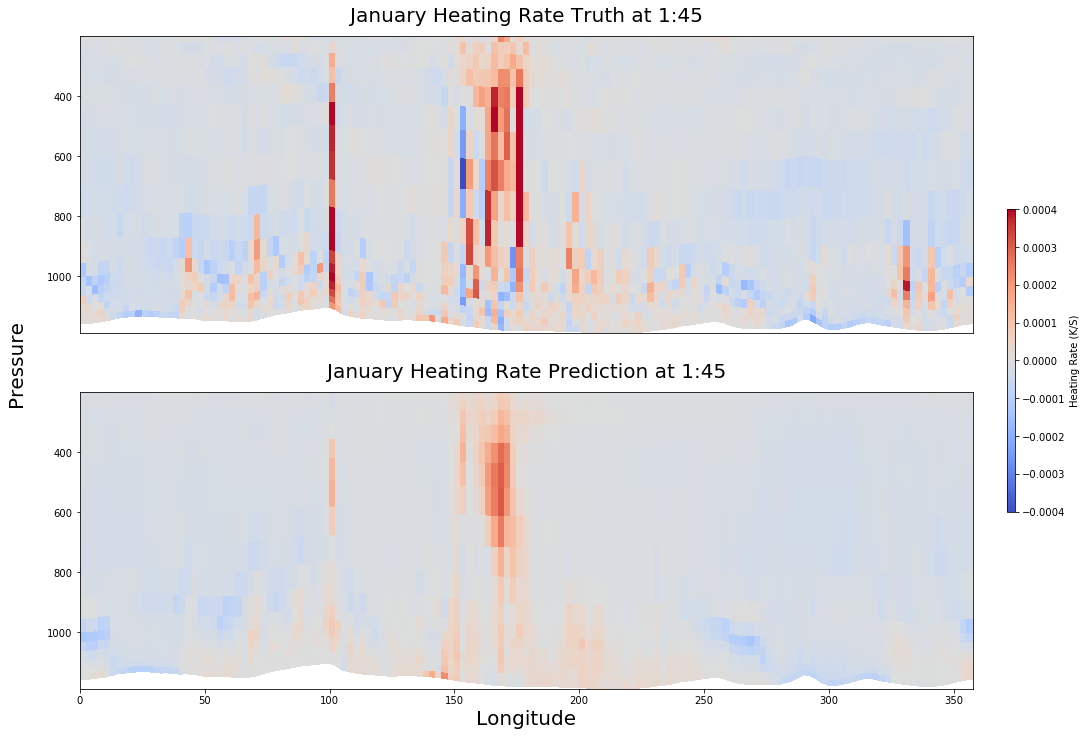

In [61]:
def double_weather_heat(targets, features, X_var, Y_var):
    print('hi')
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    counter = -1
    fig, ax_array = plt.subplots(2, 1)
    Y_var = Y_var*(2.0-3.0)
    container = []
    num_of_snaps = 12
    #96 steps in a day
    interval = 276
    #just over a day in
    #base is 100
    times = 672
    utc_list = utc_timing(times)
    for i in range(times):
        if i%100==0:
            print(i)
        if i%285==0:
            counter = counter+1
            
        targ = targets[:, i, :]
        feat = features[:, i, :]
        
        #avoid mixing the labels into the colorbar
        if i == 0:
            #plt.xlabel('Latitude',fontsize=20)
            plt.xlabel('Longitude',fontsize=20)
            plt.ylabel('Pressure', fontsize=20)
            
        ax2, ax3 = ax_array.flatten()
        fig.set_size_inches(16,12)
        #print(targ.shape, feat.shape, Xvar.T.shape, Yvar.T.shape)
        
        #regular
        contour_plot_targ = ax2.pcolor(X_var.T, Y_var, targ, cmap = 'coolwarm', animated = True, vmax = 0.00040, vmin =-0.00040)
        title_targ = ax2.text(0.5,1.05,"January Heating Rate Truth at "+str(utc_list[i]).format(i), 
                    size=20,
                    ha="center", transform=ax2.transAxes, )
        ax2.set_xticks([])
        
        my_yticks = np.arange(200, 1400, 200)
        my_yticks[::-1].sort()
        ax2.set_yticklabels(my_yticks)
        
        #regular
        contour_plot_feat = ax3.pcolor(X_var.T, Y_var, feat, cmap = 'coolwarm', animated = True, vmax = 0.00040, vmin =-0.00040)
        title_feat = ax3.text(0.5,1.05,"January Heating Rate Prediction at "+str(utc_list[i]).format(i), 
                    size=20,
                    ha="center", transform=ax3.transAxes, )
        ax3.set_yticklabels(my_yticks)
        
        if i ==0:
            position=fig.add_axes([0.93,0.33,0.007,0.35])  ## the parameters are the specified position you set 
            fig.colorbar(contour_plot_targ, cax = position, label='Heating Rate (K/S)')
            
        ax3.yaxis.set_label_coords(-0.06, 1.1)
        
        container.append([contour_plot_targ, contour_plot_feat, title_targ, title_feat])
        #start = start + interval
      
        
    #plt.gca().invert_yaxis()
    ani = animation.ArtistAnimation(fig, container, interval = 20, blit = True, repeat = True)
    ani.save('Figures/Annimate/Week_Weather_Zonal_Band_5_S_Heat_Animations.mp4')
    plt.show()

#nornal
#double_weather_heat(targs, feats, Xs, pband)
#zonal mean
double_weather_heat(targs, feats, Xvar, pband)
#print(targs.shape)

(30,)
(144, 96, 2879, 30)


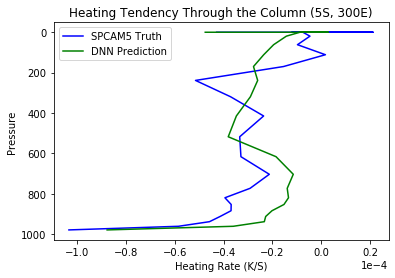

In [39]:
from matplotlib import transforms

def single_col(feats, targs, pressures):
    ######3pick a lat, lon coordinate
    #Month = January
    t = 110
    #tropical ocean
    # 5N, 225E - roughly center pacific - nino coord
    #x = 90
    #y = 50
    #tropical continent
    # 5S, 310E - S. America
    x = 124
    y = 45
    #mid latitude ocean
    # 50N, 175E - S.W of Alaska
    #x = 70
    #y = 74
    #mid latitude continent
    # 40N, 260E - Heartland
    #x = 104
    #y = 69
    
    #take into account hybrid coord
    pressures = np.nanmean(pressures, axis = 3)
    pressures = pressures[x, y, :]
    pressures = np.squeeze(pressures)
    print(pressures.shape)
    
    fig, ax = plt.subplots()
    
    print(targs.shape)
    targ = targs[x, y, t, :]
    targ = np.squeeze(targ)
    feat = feats[x, y, t, :]
    feat = np.squeeze(feat)
    
    base = plt.gca().transData
    rot = transforms.Affine2D().rotate_deg(270)
    
    plt.plot(pressures, targ, color = 'blue', transform = rot + base, label = 'SPCAM5 Truth')
    plt.plot(pressures, feat, color = 'green', transform = rot + base, label = 'DNN Prediction')
    
    plt.legend(loc='best')
    plt.ylabel("Pressure")
    #plt.xlabel('Moistening Rate')
    plt.xlabel('Heating Rate (K/S)')
    #plt.title('Moistening Tendency Through the Column')
    plt.title('Heating Tendency Through the Column (5S, 300E)')
    
    my_yticks = np.arange(0, 1400, 200)
    my_yticks[::-1].sort()
    ax.set_yticklabels(my_yticks)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    
    #plt.savefig('Figures/Single_Column_Moistening_lon_'+str(x)+'_lat_'+str(y))
    #plt.savefig('Figures/Single_Column_Heating_lon_'+str(x)+'_lat_'+str(y))
    plt.show()
    plt.close()
    
#single_col(reconstructed_features, reconstructed_targets, levs)
single_col(reconstructed_features, reconstructed_targets, p)

#print(levs) 
#print(pband.shape)
#print(p.shape)

In [40]:




          
#timing(96, 175)

def anime_col(feats, targs, pressures):
    container = []
    ######3pick a lat, lon coordinate
    #Month = January
    t = 110
    #tropical ocean
    # 5N, 225E - roughly center pacific - nino coord
    #x = 90
    #y = 50
    #tropical continent
    # 5S, 310E - S. America
    #x = 124
    #y = 45
    #mid latitude ocean
    # 50N, 175E - S.W of Alaska
    #x = 70
    #y = 74
    #mid latitude continent
    # 40N, 260E - Heartland
    x = 104
    y = 69
    
    #take into account hybrid coord
    pressures = np.nanmean(pressures, axis = 3)
    pressures = pressures[x, y, :]
    pressures = np.squeeze(pressures)
    
    fig, ax = plt.subplots(1, 1)
    times = 96
    longitudes = 260
    lst_list = timing(times, longitudes)
    for i in range(times):
        
        if i == 1:
                plt.legend(loc='best')
                plt.ylabel("Pressure")
                #plt.xlabel('Moistening Rate')
                plt.xlabel('Heating Rate (K/S)')
                #plt.title('Moistening Tendency Through the Column')
                #plt.title('Heating Tendency Through the Column (5S, 300E)')
            
        
        targ = targs[x, y, i, :]
        targ = np.squeeze(targ)
        feat = feats[x, y, i, :]
        feat = np.squeeze(feat)
    
        base = plt.gca().transData
        rot = transforms.Affine2D().rotate_deg(270)
    
        column_plot_targ, = ax.plot(pressures, targ, color = 'blue', transform = rot + base, label = 'SPCAM5 Truth', animated = True)
        #column_plot_targ, = ax.plot(pressures, targ, color = 'blue', label = 'SPCAM5 Truth', animated = True)
        column_plot_feat, = ax.plot(pressures, feat, color = 'green', transform = rot + base, label = 'DNN Prediction')
        title_feat = ax.text(0.5,1.05," Heating Tendency Through the Column (40N, 260E) at "+lst_list[i]+" LST".format(i), 
                    size=10,
                    ha="center", transform=ax.transAxes, )
        
        my_yticks = np.arange(0, 1400, 200)
        my_yticks[::-1].sort()
        ax.set_yticklabels(my_yticks)
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    
        container.append([column_plot_targ, column_plot_feat, title_feat])
        #start = start + interval
      
    ani = animation.ArtistAnimation(fig, container, interval = 150, blit = True, repeat = True)
    ani.save('Figures/Annimate/40N_260E_Single_Col_Single_Day_Heat_Animations.mp4')
    #plt.show()
    
#anime_col(reconstructed_features, reconstructed_targets, p)

In [41]:
print('made_it')

made_it
